In [7]:
import json
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

folder = "../../../saved_evolutions/2024-03-10T16-06-22_evolve/"

In [6]:
infile = folder + "evolution_operations.csv"
df = pd.read_csv(infile)
df

,generation,new_genome_id,mutation_parent,crossover_parent_1,crossover_parent_2,mutation,crossover,loss_total,loss_fundamental_loss,loss_harmonic_loss,loss_n_notes_loss,loss_toots_loss
0,-1,1,NaN,NaN,NaN,['init'],NaN,9.076259,2.781799,0.151603,6.142857,0.900097
1,-1,2,NaN,NaN,NaN,['init'],NaN,6.900156,0.218201,0.110526,6.571429,0.325932
2,-1,3,NaN,NaN,NaN,['init'],NaN,8.626923,2.031799,0.023696,6.571429,0.070088
3,-1,4,NaN,NaN,NaN,['init'],NaN,7.488001,0.884868,0.031704,6.571429,0.139293
4,-1,5,NaN,NaN,NaN,['init'],NaN,7.416526,0.990132,0.140680,6.285714,0.620614
...,...,...,...,...,...,...,...,...,...,...,...,...
66252,477,84524,80547.0,NaN,NaN,['RandomMutation'],NaN,8.375220,1.698465,0.105326,6.571429,0.401198
66253,477,84525,82788.0,NaN,NaN,['SimpleMutation'],NaN,11.214495,4.490132,0.295792,6.428571,1.101713
66254,477,84526,81145.0,NaN,NaN,['RandomMutation'],NaN,7.199060,0.573465,0.054167,6.571429,0.257950
66255,477,84527,82172.0,NaN,NaN,['RandomMutation'],NaN,10.594111,3.781799,0.098026,6.714286,0.490132


<AxesSubplot: xlabel='generation', ylabel='value'>

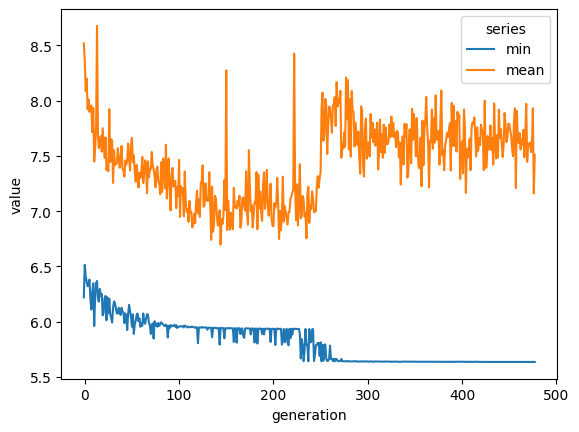

In [20]:
from typing import DefaultDict

vals = DefaultDict(list)

x=[]
y=[]
for generation in df.sort_values(by="generation").generation.unique():
    vals["generation"].append(generation)
    vals["value"].append(df.query("generation==@generation").loss_total.min())
    vals["series"].append("min")
    vals["generation"].append(generation)
    vals["value"].append(df.query("generation==@generation").loss_total.mean())
    vals["series"].append("mean")
    # vals["generation"].append(generation)
    # vals["value"].append(df.query("generation==@generation").loss_total.max())
    # vals["label"].append("max")

vals = pd.DataFrame(vals)
sns.lineplot(data=vals, x="generation", y="value", hue="series")


In [23]:
individuals = {}
for ix, row in df.iterrows():
    individuals[row["new_genome_id"]] = row["loss_total"]

In [28]:
dfo = DefaultDict(list)
for ix, row in df.query("generation>=0").iterrows():

    operations = row["mutation"]
    operations = operations.replace("'", "")
    operations = operations.replace("[", "")
    operations = operations.replace("]", "").split(", ")
    print(operations)
    break
    count+=1
    if count >= 10:
        break

['RandomMutation', 'AverageCrossover']
